# Introduction

In [19]:
!pip install qiskit[visualization] --quiet

In [4]:
import qiskit
import qiskit as q
import matplotlib.pyplot as plt

def grid(handle=None):
    """
    Adds minor and major grid to the plot
    """
    if handle:
        handle.grid(which='major', color='#DDDDDD', linewidth=0.8)
        handle.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
        handle.minorticks_on()
    else:
        plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
        plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
        plt.minorticks_on()

### Building a Circuit and the Circuit Structure

In [2]:
# 3 qubit circuit
circ = qiskit.QuantumCircuit(3)

# add a H gate on qubit 0 and 1
circ.h(0)
circ.h(1)

# add a CNOT gate on qubits 1 and 2 and a H on qubit 1
circ.cx(1, 2)

# alternatively append gates
hgate = qiskit.circuit.library.HGate()
circ.append(hgate, [1])

print(circ) # inline print of the circuit diagram

     ┌───┐          
q_0: ┤ H ├──────────
     ├───┤     ┌───┐
q_1: ┤ H ├──■──┤ H ├
     └───┘┌─┴─┐└───┘
q_2: ─────┤ X ├─────
          └───┘     


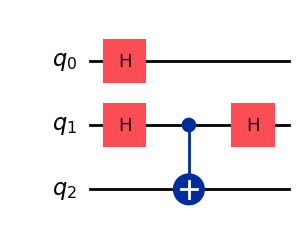

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# fancy plot with matplotlib
circ.draw('mpl')

### The Quantum Gates in Qiskit
We can access the unitary matrix of the gates in qiskit, such as the X-rotation gate $\exp(-iX\theta/2)$. We can also customize our own gates for simulation purpose.

Usually we want to use the built-in gates in qiskit which are compatible with many of the built-in qiskit functions, e.g. in certain optimizations.

You can find the list of built-in gates in the qiskit documentation `qiskit.circuit.library`.

In [7]:
import numpy as np

# Hadamard gate
print('Hadamard gate:')
print(qiskit.circuit.library.HGate().to_matrix().real)

# Can access the gate for X-rotation
print('X-rotation:')
print(qiskit.circuit.library.RXGate(np.pi/2).to_matrix())

# for X**p gate
print('X power:')
print((qiskit.circuit.library.XGate()**0.5).to_matrix())

# two qubit CNOT gate
print('CNOT:')
print(qiskit.circuit.library.CXGate().to_matrix().real)

Hadamard gate:
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
X-rotation:
[[0.70710678+0.j         0.        -0.70710678j]
 [0.        -0.70710678j 0.70710678+0.j        ]]
X power:
[[0.5+0.5j 0.5-0.5j]
 [0.5-0.5j 0.5+0.5j]]
CNOT:
[[1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]]


Qiskit allows for general single-qubit rotation such as the following
$$
U(\theta,\phi,\lambda) = \left[\begin{matrix} \cos\left(\frac{\theta}{2}\right) & -e^{i\lambda} \sin\left(\frac{\theta}{2}\right) \\ e^{i\phi}\sin\left(\frac{\theta}{2}\right) & e^{i(\phi+\lambda)}\cos\left(\frac{\theta}{2}\right)
\end{matrix}\right]
$$

[[ 0.70710678+0.j         -0.65328148-0.27059805j]
 [ 0.5       +0.5j         0.27059805+0.65328148j]]


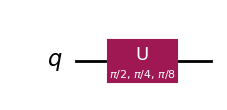

In [25]:
circ = qiskit.QuantumCircuit(1)
circ.u(np.pi/2,np.pi/4,np.pi/8,0)
print((qiskit.circuit.library.UGate(np.pi/2,np.pi/4,np.pi/8)).to_matrix())

circ.draw('mpl')

__WARNING!__

In contrast to the convention that you might be used to qiskit encodes the qubit from right to left, e.g. if $q_0 = |1\rangle$ and $q_1 = |0\rangle$ the 2-qubit state is represented as $|01\rangle$, and therefore also the tensor product is reversed, e.g. $CX$ would be represented as $X_1 \otimes I_0$, resulting in the above matrix representation.

### Hands-on coding

Can you write a function that returns the GHZ circuit on L qubits?
$$
|\psi\rangle = \frac{1}{\sqrt{2}}\left(|00\cdots 0\rangle + |11\cdots 1\rangle\right)
$$

In [8]:
def GHZ(L):
  ghz = q.QuantumCircuit(L)
  ghz.h(0)
  for i in range(L-1):
    ghz.cx(i, i+1)  # MODIFY CODE HERE!
  return ghz


print(GHZ(5))

     ┌───┐                    
q_0: ┤ H ├──■─────────────────
     └───┘┌─┴─┐               
q_1: ─────┤ X ├──■────────────
          └───┘┌─┴─┐          
q_2: ──────────┤ X ├──■───────
               └───┘┌─┴─┐     
q_3: ───────────────┤ X ├──■──
                    └───┘┌─┴─┐
q_4: ────────────────────┤ X ├
                         └───┘


### Simulating the Circuit
Qiskit provides handy simulator methods for quantum circuits. If you are using your laptop, you will be performing classical simulation. From __simulations__ we can get access to the full wavefunction that is constructed and modified by the quantum circuit.

However, if you are using a real quantum processor the wavefunciton is not accessible and you have to draw samples instead. More on that will follow later.

Qiskit has many options to simulate a circuit. Here we will restrict ourself to the `AerSimulator()`, which can be used for both simulating and sampling.

Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2, 2, 2))


<IPython.core.display.Latex object>

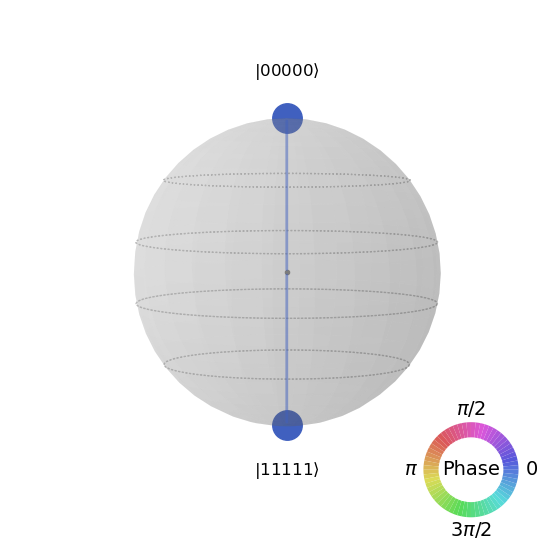

In [13]:
from qiskit_aer.backends import AerSimulator
sim = AerSimulator(method="statevector")

L = 5

# initialize the simulator in the "statevector" mode to simulate full wave function
sim = AerSimulator(method="statevector")

circ = GHZ(L)
circ.save_statevector()  # save statevector at the end of the circuit
state = sim.run(circ).result().get_statevector()

print(state)

# draw using latex
display(state.draw('latex'))

# draw on Bloch sphere
display(state.draw('qsphere'))


next we want to compute expectation values of local operators

In [15]:
from qiskit.quantum_info import Pauli

# Expectation value computed from state vector
print("Exact Expectation:")
print(f"<Z> on qubit 1 is {state.expectation_value(Pauli('Z'), [1])}")
print(f"<ZZ> on qubit 1 and 2 is {state.expectation_value(Pauli('ZZ'), [1, 2])}")

Exact Expectation:
<Z> on qubit 1 is 0.0
<ZZ> on qubit 1 and 2 is 1.0000000000000002


### Measurements on a circuit

On real devices we cannot simulate the full wavefunction but instead have to __measure__/ __sample__. 
In Qiskit we can mimic this by adding measurements which output the result to a classical channel.

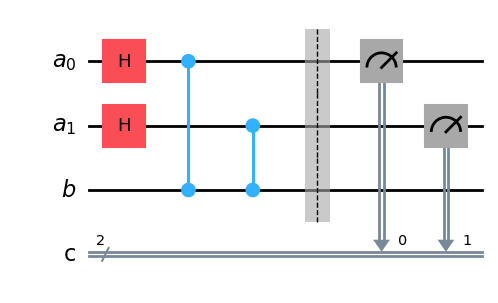

In [19]:
# define quantum and classical channels
a = qiskit.QuantumRegister(2, name = 'a')
b = qiskit.QuantumRegister(1, name = 'b')
c = qiskit.ClassicalRegister(2, name = 'c') # classical register to store the measurement outcome
circ = qiskit.QuantumCircuit(a, b, c) 
# alternative: qiskit.QuantumCircuit(2, 1) for 2 qubits and 1 classical channel


circ.h(a)
circ.cz(a, b)
circ.barrier() # visual barrier
circ.measure(a, c)  # measure qubit a and store the result in c

circ.draw('mpl')

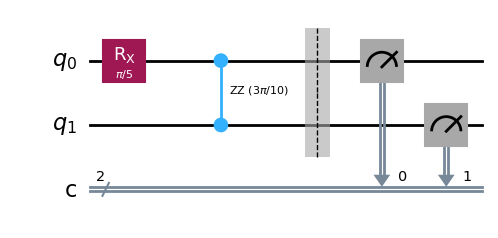

In [20]:
# Alternatively, we can shorten the codes using default namings.

circ = qiskit.QuantumCircuit(2,2)
circ.rx(0.2*np.pi, 0)
circ.rzz(0.3*np.pi, 0, 1)
circ.barrier()
circ.measure(range(2), range(2)) # Measure the Quantum bits and store the result in the Classical bits
circ.draw('mpl')

{'00': 90, '01': 10}


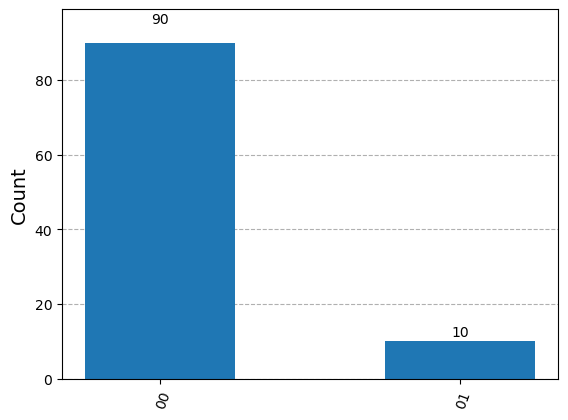

In [21]:
# run the circuit above via Aer

sim = AerSimulator()

N_shots = 100  # number of measurements

result = sim.run(circ, shots=N_shots).result()
counts = result.get_counts(circ)
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Noise

In a closed system, the quantum state is always pure. However this is not true in the real world. The system will interact with the environment and become noisy.

Noise in the quantum system is in general realized by some __quantum channel__. Quantum channels map a density matrix to another density matrix of the quantum system, i.e. the quantum states are generally mixed.

Noise can be included in Qiskit simulations in many ways. Let us consider an example here, and you will get to choose your favorite approach in later exercises.

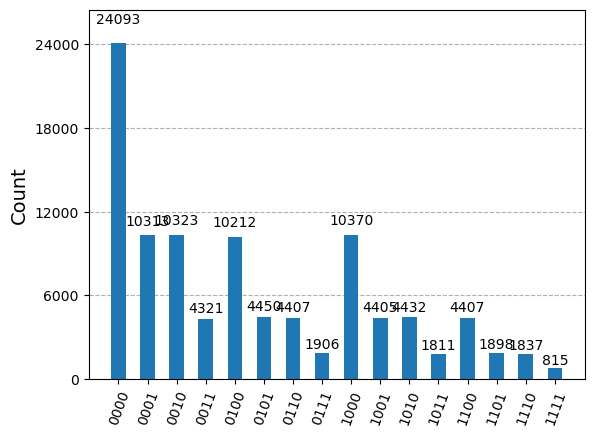

In [37]:
from qiskit.quantum_info import Pauli
from qiskit_aer.noise import NoiseModel, pauli_error
noisy_circ = qiskit.QuantumCircuit(4)
noisy_circ.measure_all() # trivial circuit, just measure

noise = NoiseModel()
# initialize bitflip error with a certain probability
p_error = 0.3
bit_flip_error = pauli_error([(Pauli('X'), p_error), (Pauli('I'), 1-p_error)])

noise.add_all_qubit_quantum_error(bit_flip_error, ['measure'])

simulator = AerSimulator(noise_model = noise)
result = simulator.run(noisy_circ, shots=100000).result().get_counts(noisy_circ)
plot_histogram(result)

**Question:** How do the heights relate to the number of 1's in the bitstrings?\
$p_{state} = (p_{error})^{\#1} \cdot (1-p_{error})^{\#0} $

In [40]:
for i in range(5):
    print(f'probabiltiy for {i} bit flip error(s): {np.round(p_error**i * (1-p_error)**(4-i)*100,2)}%')

probabiltiy for 0 bit flip error(s): 24.01%
probabiltiy for 1 bit flip error(s): 10.29%
probabiltiy for 2 bit flip error(s): 4.41%
probabiltiy for 3 bit flip error(s): 1.89%
probabiltiy for 4 bit flip error(s): 0.81%


We can also add noise to the quantum operations.

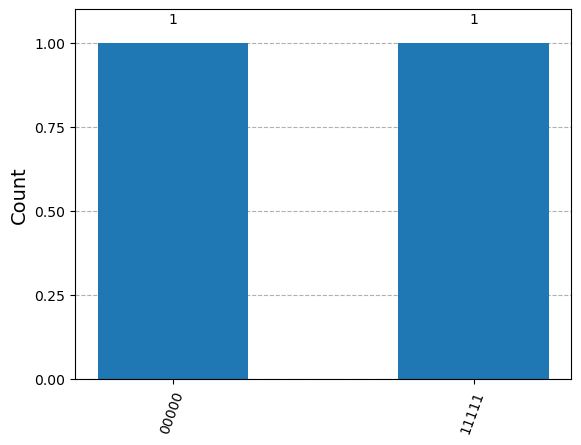

In [42]:
from qiskit_aer.noise import depolarizing_error
circ = GHZ(5)
circ.measure_all()

# Noiseless experiment
simulator = AerSimulator()
result = simulator.run(circ, shots = 2).result().get_counts(circ)
plot_histogram(result)

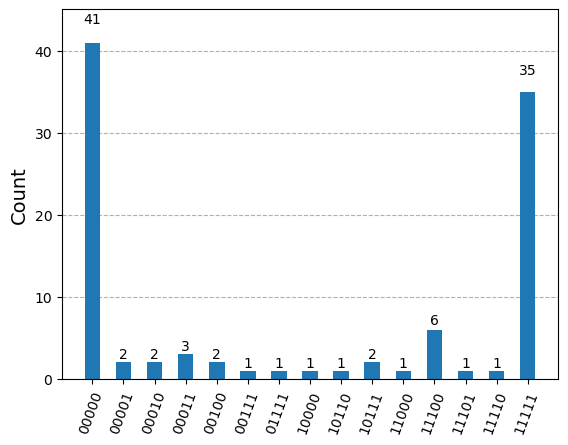

In [43]:
# Noisy experiment, where CNOTs are noisy
noise = NoiseModel()
error = depolarizing_error(param = 0.1, num_qubits = 2)
noise.add_all_qubit_quantum_error(error, ['cx'])

simulator = AerSimulator(noise_model = noise)
result = simulator.run(circ, shots = 100).result().get_counts(circ)
plot_histogram(result)

# Readout Matrix unfolding 

given:
$\Sigma_a (v_a') != 1$ condition


$v_a' = \Sigma_{b} P_{ab} v_b $ definition

$\Sigma_a (v_a') = 1 =  \Sigma_a \Sigma_b P_{ab} v_b  = \Sigma_b \Sigma_a P_{ab} v_b  $ (swap since sum over a finite numnber of finite numbers)

with $ \Sigma_a P_{ab} = 1 $ (probabilty to measure the prepared bitstring in any result is 100%)

=> $\Sigma_b v_b = 1 $ 

and 

$v_a = \Sigma_{a'} P^{-1}_{a a'} v_{a'}' = \Sigma_{a'} P^{-1}_{a a'} \Sigma_b P_{a' b} v_b $

=> $v_a = v_b $

with $ \Sigma_{a'} P^{-1}_{a a'} \Sigma_b P_{a' b} = 1_{ab}$

# Quantum Teleportation

In [2]:
from qiskit_aer.backends import AerSimulator
import matplotlib.pyplot as plt
def grid():
    """
    Adds minor and major grid to the plot
    """
    plt.grid(which='major', color='#DDDDDD', linewidth=0.8)
    plt.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
    plt.minorticks_on()
sim = AerSimulator(method="statevector")


## Day 1, Ex 2

### a) Bell measurements

In [44]:
circ = q.QuantumCircuit(2,2)
circ.cx(0,1)
circ.h(0)
circ.barrier()
circ.measure([0,1], [0,1])
print(circ)

          ┌───┐ ░ ┌─┐   
q_0: ──■──┤ H ├─░─┤M├───
     ┌─┴─┐└───┘ ░ └╥┘┌─┐
q_1: ┤ X ├──────░──╫─┤M├
     └───┘      ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1 


### b) state conversion

$\ket{\phi^+}: I $

$\ket{\phi^-}: Z $

$\ket{\psi^+}: X $

$\ket{\psi^-}: XZ $

In [45]:
def print_state(circ):
    circ = tele
    circ.save_statevector()  # save statevector at the end of the circuit
    state = sim.run(circ).result().get_statevector()
    display(state.draw('latex'))

def phi_p(state, ind1=0, ind2=None):
    if not ind2:
        ind2 = ind1 +1
    state.h(ind1)
    state.cx(ind1,ind2)
    return state

def phi_m(state, ind1=0, ind2=None):
    if not ind2:
        ind2 = ind1 +1
    state.x(ind1)
    state.h(ind1)
    state.cx(ind1,ind2)
    return state

def psi_p(state, ind1=0, ind2=None):
    if not ind2:
        ind2 = ind1 +1
    state.h(ind1)
    state.cx(ind1,ind2)
    state.x(ind1)
    return state


def psi_m(state, ind1=0, ind2=None):
    if not ind2:
        ind2 = ind1 +1
    state.x(ind1)
    state.h(ind1)
    state.cx(ind1,ind2)
    state.x(ind2)
    return state

def bell_meas(state, ind1=0, ind2=None):
    if not ind2:
        ind2 = ind1 +1
    state.cx(ind1,ind2)
    state.h(ind1)
    state.measure([ind1, ind2], [0,1])


def teleportation_state():
    tele = q.QuantumCircuit(3,2)
    tele.h(1)
    tele.cx(1,2)
    return tele

def runc(circ, shots=400, noise_model=None, fakebackend=None):
    circ.measure_all()
    if not fakebackend:
        simulator = AerSimulator(noise_model = noise_model)
    else:
        simulator = q.transpile(circ, fakebackend)
        simulator = fakebackend
    counts = simulator.run(circ, shots = shots).result().get_counts(circ)
    return(counts)




In [46]:
tele = q.QuantumCircuit(3,2)
psi_p(tele)
print_state(tele)
bell_meas(tele)
runc(tele)

# draw using latex


<IPython.core.display.Latex object>

{'010 10': 400}

In [283]:
plt.rcParams['xtick.direction'] = 'in'  # Options: 'in', 'out', 'inout'
plt.rcParams['ytick.direction'] = 'in'

## Day 1, Task 2: Rabi Oscillations

### time evolution

In [167]:

from qiskit.visualization import plot_histogram
import qiskit_aer as aer
import scipy as scp
import numpy as np
import matplotlib.pyplot as plt
import qiskit_aer.noise as noise

t = np.arange(0, 4.001, 0.05)
w = 25.5
w0 = 25
w1 = 2
Del = w-w0
O = np.sqrt(w1**2 + Del**2)

In [172]:
RX = qiskit.circuit.library.RXGate
RZ = qiskit.circuit.library.RZGate

def Us(N= len(t), dt=None, w=w, w0=w0, w1=w1):
    # sigZ = np.array([[1, 0],[ 0, -1]])
    # sigX = np.array([[0, 1],[ 1, 0]])
    # expo = 0
    U = []
    for n in range(N):
        Ux = RX(2 * w1*dt *np.cos(w*n*dt))
        Uz = RZ(-w0*dt)
        U.append([Ux,Uz])
    # for i in range(N):
    #     expo = -1j*w1*dt *np.cos(w*i*dt)*sigX + 1j*w0*dt/2*sigZ
    #     U.append(qiskit.circuit.library.UnitaryGate(scp.linalg.expm(expo)))
    return U

def U_at_t(N= len(t), dt=t[1]-t[0], w=w, w0=w0, w1=w1):
    ## This is WRONG
    rx_expo = 0
    rz_expo = 0
    for i in range(N):
        #expo = expo - 1j*w1*dt *np.cos(w*i*dt)*sigX + 1j*w0*dt/2*sigZ
        rx_expo = rx_expo + 2 * w1*dt *np.cos(w*i*dt)
        rz_expo = rz_expo - w0*dt
    #U = qiskit.circuit.library.UnitaryGate(scp.linalg.expm(expo))
    U = [RX(rx_expo), RZ(rz_expo)]
    return U

def time_evolve(t, circ=None, dt=None, w=w, w0=w0, w1=w1, shots=400, noise_model=None, fakebackend=None):
    if circ is None:
        circ = q.QuantumCircuit(1)
    if dt is None:
        dt = t[1]-t[0]
    U = Us(len(t),  dt=dt, w=w, w0=w0, w1=w1)
    counts = []
    for i, ts in enumerate(t):
        circ.append(U[i][0], [0])
        circ.append(U[i][1], [0])

        cm = circ.copy()
        counts.append(runc(cm, shots=shots, noise_model=noise_model, fakebackend=fakebackend))
    return counts

def sweep_w(t, dt=t[1]-t[0], w=None, w0=w0, w1=w1, shots=400, noise_model=None):
    counts = []
    for ws in w:
        circ = q.QuantumCircuit(1)
        for U in Us(len(t),  dt, w=ws, w0=w0, w1=w1):
            circ.append(U[0], [0])
            circ.append(U[1], [0])
        # U = U_at_t(len(t),  dt=dt, w=ws, w0=w0, w1=w1)
        # circ.append(U[0], [0])
        # circ.append(U[1], [0])

        #print(U.to_matrix())
        #circ.append(U, [0])
        counts.append(runc(circ, shots=shots, noise_model=noise_model))
    return counts

def alpha_beta(w, w0, w1, t):
    Del = w-w0
    O = np.sqrt(w1**2 + Del**2)
    alpha = np.exp(1j*w*t/2) * (np.cos(O*t/2) - 1j*Del/O *np.sin(O*t/2))
    beta = np.exp(-1j*w*t/2) * - 1j*w1/O *np.sin(O*t/2)
    return alpha, beta

def population(counts):
    pop = np.zeros(len(counts))
    for i, c in enumerate(counts):
        try:
            pop[i] = c['1']/sum(c.values())
        except:
            pop[i]=0
    return pop

In [67]:
shots = 400
t_small = np.arange(0, 10.001, 0.005)
c_small = time_evolve(t=t_small, w=w, w0=w0, w1=w1, shots=shots)
trace_small = population(c_small)

KeyboardInterrupt: 

### Task 5&6 a)

In [173]:
shots = 400
t = np.arange(0, 4.001, 0.05)
c = time_evolve(t, w=w, w0=w0, w1=w1, shots=shots)
pop_sim = population(c)

In [176]:
nModel = noise.noise_model.NoiseModel()
gamma = 0.02
p = 0.1
nModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])
count_noise = time_evolve(t=t, w=w, w0=w0, w1=w1, shots=shots, noise_model=nModel)
pop_noise_sim = population(count_noise)

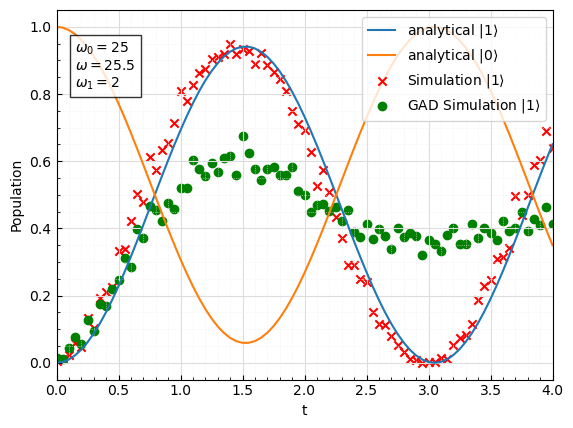

In [330]:
alpha, beta = alpha_beta(w, w0, w1, t)
plt.plot(t, np.abs(beta)**2, label=r'analytical $|1\rangle$')
plt.plot(t,np.abs(alpha)**2, label=r'analytical $|0\rangle$')
plt.scatter(t, pop_sim, label=r'Simulation $|1\rangle$', color='r', marker='x')
plt.scatter(t, pop_noise_sim, label=r'GAD Simulation $|1\rangle$', color='g')
plt.xlabel('t')
plt.ylabel('Population')

specs = '$\omega_0=$'+str(w0)+'\n$\omega=$'+str(w)+'\n$\omega_1=$'+str(w1) 
plt.text(0.15, 0.82, specs, bbox=dict(facecolor='white', alpha=0.8))
plt.legend()
plt.xlim([0,t[-1]])
grid()

### Task 5&6 b)

In [178]:
detuning = np.linspace(-15, 15, 150)
tws = np.pi/ w1

In [182]:
alpha_w, beta_w = alpha_beta(w0+detuning, w0, w1, tws)
shots = 400
t = np.arange(0, np.pi/ w1, 0.05)
swcount = sweep_w(t, dt=t[1]-t[0], w=w0+detuning, w0=w0, w1=w1, shots=shots, noise_model=None)
sw_sim_pop = population(swcount)

nModel = noise.noise_model.NoiseModel()
gamma = 0.02
p = 0.1
nModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])
sw_count_noise = sweep_w(t=t, w=w0+detuning, w0=w0, w1=w1, shots=shots, noise_model=nModel)
sw_pop_noise_sim = population(sw_count_noise)


(-15.0, 15.0)

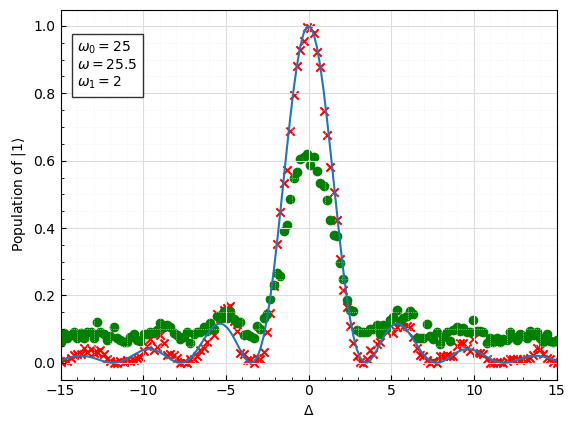

In [329]:
plt.plot(detuning, np.abs(beta_w)**2, label='analytical')
plt.scatter(detuning, sw_sim_pop, label='simulation', color='red', marker='x')
plt.scatter(detuning, sw_pop_noise_sim, label='GAD simulation', color='g', marker='o')

specs = '$\omega_0=$'+str(w0)+'\n$\omega=$'+str(w)+'\n$\omega_1=$'+str(w1) 
plt.text(-14, 0.82, specs, bbox=dict(facecolor='white', alpha=0.8))
plt.xlabel('$\Delta$')
plt.ylabel(r'Population of $|1\rangle$')
grid()
plt.xlim([detuning[0], detuning[-1]])

### Comparing stepwidths 

In [51]:
shots = 400
t_long = np.arange(0, 4.001, 0.05)
w = 25.5
c_l = time_evolve(t=t_long,dt=t_long[1]-t_long[0], w=w, w0=w0, w1=w1, shots=shots)
trace_l = np.zeros_like(t_long)
for i in range(len(t_long)):
    try:
        trace_l[i] = c_l[i]['1']
    except:
        trace_l[i] = shots-c_l[i]['0']

In [52]:
alpha, beta = alpha_beta(w, w0, w1, t_long)


In [ ]:
# wide timeframe
t_small = np.arange(0, 10.001, 0.005)
c_small = time_evolve(t_small,dt=t_small[1]-t_small[0], w=w, w0=w0, w1=w1, shots=shots)
trace_small = np.zeros_like(t_small)
for i in range(len(t_small)):
    try:
        trace_small[i] = c_small[i]['1']
    except:
        trace_small[i] = shots - c_small[i]['0']

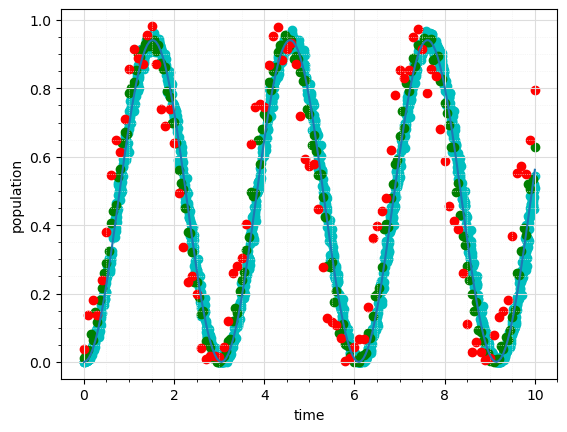

In [187]:
#plt.plot(t_long, np.square(np.abs(alpha)))
plt.plot(t_long, np.square(np.abs(beta)))
plt.scatter(t_small, trace_small/shots, color='c')
plt.scatter(t_long, trace_l/shots, color='g')
plt.scatter(t_rough, trace_rough/shots, color='r')

plt.xlabel('time')
plt.ylabel('population')

grid()
plt.show()

### c) at resonance

In [184]:
t = np.arange(0, 4.001, 0.05)
# anlaytical solution
alpha_r, beta_r = alpha_beta(2, 2, 2, t)

shots=400
# noiseless simulation
counts_r = time_evolve(t, w=2, w0=2, w1=2, shots=shots)
trace_r = population(counts_r) #np.zeros_like(t)

# model noise
nModel = noise.noise_model.NoiseModel()
gamma = 0.02
p = 0.1
nModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])
res_count_noise = time_evolve(t=t, w=2, w0=2, w1=2, shots=shots, noise_model=nModel)
res_pop_noise_sim = population(res_count_noise)

In [153]:
alpha_r, beta_r = alpha_beta(2, 2, 2, t)


(0.0, 4.0)

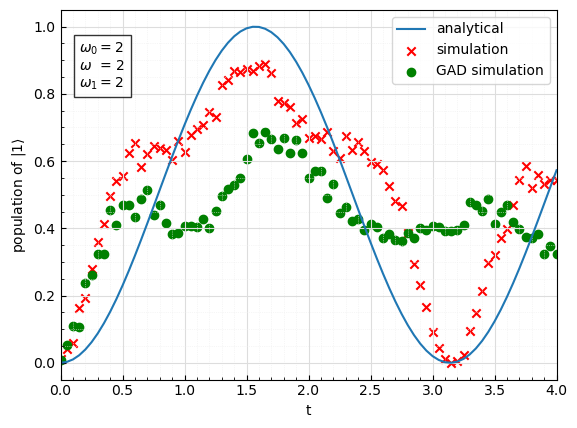

In [335]:
#plt.plot(t, np.square(np.abs(alpha_r)))
plt.plot(t, np.square(np.abs(beta_r)), label='analytical')
plt.scatter(t, trace_r, label='simulation', color='red', marker='x')
plt.scatter(t, res_pop_noise_sim, label='GAD simulation', color='g', marker='o')
plt.xlabel('t')
plt.ylabel(r'population of $|1\rangle$')
plt.legend()
specs = '$\omega_0=$'+str(2)+'\n$\omega$  = '+str(2)+'\n$\omega_1=$'+str(2) 
plt.text(0.15, 0.82, specs, bbox=dict(facecolor='white', alpha=0.8))
grid()
plt.xlim([0, t[-1]])

## Noise

### dt

In [241]:
import qiskit_aer.noise as noise
nModel = noise.noise_model.NoiseModel()

gamma = 0.02
p = 0.2
nModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])

In [348]:
t_max = 10.001
shots=400
dt = 0.01
t_dt = np.arange(0, t_max, dt)
counts_ndt = time_evolve(t_dt,dt=dt, w=25.5, w0=25, w1=0.1, shots=shots, noise_model=nModel)
trace_ndt = population(counts_ndt) #np.zeros_like(t)

In [345]:
# low noise
lnModel = noise.noise_model.NoiseModel()
gamma = 0.02/5
p = 0.1
lnModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])
t_max = 10.001
shots=400
dt = 0.01
t_dt = np.arange(0, t_max, dt)
nn_counts_ndt = time_evolve(t_dt,dt=dt, w=25.5, w0=25, w1=2, shots=shots, noise_model=lnModel)
NN_trace_ndt = population(nn_counts_ndt) #np.zeros_like(t)

In [337]:
dt = 0.05
t = np.arange(0, t_max, dt)
counts_n = time_evolve(t,dt=dt, w=25.5, w0=25, w1=2, shots=shots, noise_model=nModel)
trace_n = population(counts_n) #np.zeros_like(t)


(0.0, 10.0)

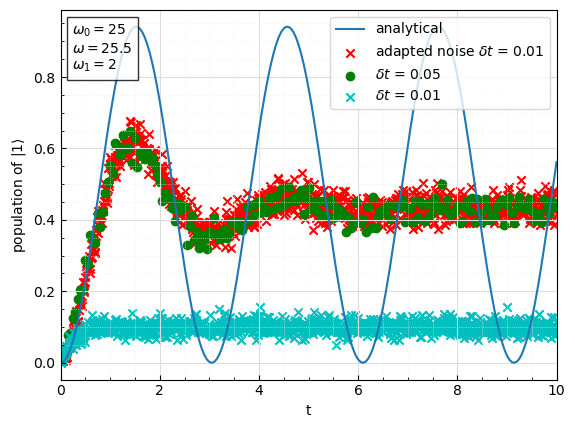

In [349]:
plt.plot(t, np.square(np.abs(alpha_beta(w, w0, w1, t)[1])), label='analytical')
plt.scatter(t_dt, NN_trace_ndt, label=r'adapted noise $\delta t$ = 0.01', color='r', marker='x')

plt.scatter(t, trace_n, label=r'$\delta t$ = 0.05', color='g', marker='o')
plt.scatter(t_dt, trace_ndt, label=r'$\delta t$ = 0.01', color='c', marker='x')

specs = '$\omega_0=$'+str(w0)+'\n$\omega=$'+str(w)+'\n$\omega_1=$'+str(w1) 
plt.text(0.24, 0.82, specs, bbox=dict(facecolor='white', alpha=0.8))
grid()
plt.xlabel('t')
plt.ylabel(r'population of $|1\rangle$')
plt.legend()
plt.xlim([0, t[-1]])

### T1

In [370]:
T1_noise_model = noise.noise_model.NoiseModel()
T1_noise_model.add_all_qubit_quantum_error(noise.amplitude_damping_error(0.002, 0.1), ['rx','rz', 'measure'])
t_max = 30.001
shots=400
dt = 0.05
t_long = np.arange(0, t_max, dt)
w = 25

In [371]:
counts_t1 = time_evolve(t_long,dt=dt, w=w, w0=25, w1=2, shots=shots, noise_model=T1_noise_model)
trace_t1 = population(counts_t1)

In [372]:
# fast decay
decay_noise_model = noise.noise_model.NoiseModel()
decay_noise_model.add_all_qubit_quantum_error(noise.amplitude_damping_error(0.2, 0.1), ['rx','rz', 'measure'])
counts_decay = time_evolve(t_long,dt=dt, w=w, w0=25, w1=2, shots=shots, noise_model=decay_noise_model)
trace_decay = population(counts_decay)

In [373]:
# weak drive
weakd_noise_model = noise.noise_model.NoiseModel()
weakd_noise_model.add_all_qubit_quantum_error(noise.amplitude_damping_error(0.02, 0.1), ['rx','rz', 'measure'])
counts_weak = time_evolve(t_long,dt=dt, w=w, w0=25, w1=0.2, shots=shots, noise_model=weakd_noise_model)
trace_weak = population(counts_weak)

(0.0, 30.0)

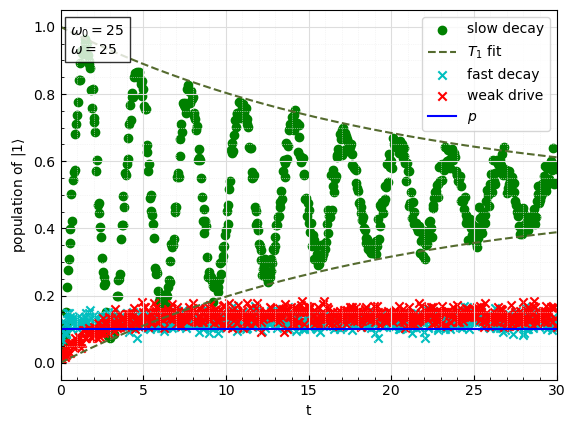

In [374]:
#trace_o = trace_n
T1 = 20
grid()
specs = '$\omega_0=$'+str(w0)+'\n$\omega=$'+str(w)#+'\n$\omega_1=$'+str(w1) 
plt.text(0.6, 0.92, specs, bbox=dict(facecolor='white', alpha=0.8))
plt.scatter(t_long, trace_t1, label='slow decay', color='g', marker='o')
plt.plot(t_long, np.exp(-t_long/T1)/2 + 0.5, linestyle='--', label='$T_1$ fit', color='darkolivegreen')
plt.plot(t_long, (1-np.exp(-t_long/T1))/2, linestyle='--', color='darkolivegreen')
plt.scatter(t_long, trace_decay, label='fast decay', color='c', marker='x')
plt.scatter(t_long, trace_weak, label='weak drive', color='r', marker='x')
plt.axhline(0.1, c='b', label='$p$')

#plt.scatter(t, trace_o/shots, label='noisy', color='red', marker='o')
plt.xlabel('t')
plt.ylabel(r'population of $|1\rangle$')
plt.legend()
plt.xlim([0, t_long[-1]])


## 7c) Fake provider

In [375]:
from qiskit.providers.fake_provider import Fake5QV1

In [376]:
nModel = noise.noise_model.NoiseModel()

gamma = 0.02
p = 0.1
nModel.add_all_qubit_quantum_error(noise.amplitude_damping_error(gamma, p), ['rx','rz', 'measure'])

In [377]:
t_max = 10.001
shots=400
dt = 0.05
t_noisecomp = np.arange(0, t_max, dt)
counts_ncomp = time_evolve(t=t_noisecomp, w=25.5, w0=25, w1=2, shots=shots, noise_model=nModel)
trace_comp = population(counts_ncomp) #np.zeros_like(t)

In [378]:
counts_nf = time_evolve(t=t_noisecomp, w=25.5, w0=25, w1=2, shots=shots, fakebackend=Fake5QV1())
trace_nf = population(counts_nf)

In [380]:
dt = 0.01
t_small_noisecomp = np.arange(0, 10.001, dt)
counts_small_nf = time_evolve(t=t_small_noisecomp, w=25.5, w0=25, w1=2, shots=shots, fakebackend=Fake5QV1())
trace_small_nf = population(counts_small_nf)

In [396]:
noiseless_c = time_evolve(t=t_noisecomp, w=25.5, w0=25, w1=2, shots=shots)
trace_noiseless = population(noiseless_c)

(0.0, 10.0)

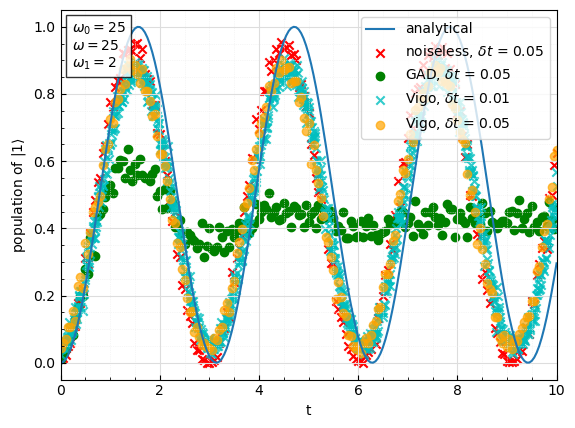

In [404]:
plt.plot(t_noisecomp, np.square(np.abs(alpha_beta(w, w0, w1, t_noisecomp)[1])), label='analytical')
plt.scatter(t_noisecomp, trace_noiseless, label='noiseless, $\delta t$ = 0.05', color='r', marker='x')

plt.scatter(t_noisecomp, trace_comp, label='GAD, $\delta t$ = 0.05', color='g', marker='o')
plt.scatter(t_small_noisecomp, trace_small_nf, label=r'Vigo, $\delta t$ = 0.01', color='c', marker='x', alpha=0.8)

plt.scatter(t_noisecomp, trace_nf, label=r"Vigo, $\delta t$ = 0.05", color='orange', marker='o', alpha=0.7)
specs = '$\omega_0=$'+str(w0)+'\n$\omega=$'+str(w)+'\n$\omega_1=$'+str(w1) 
plt.text(0.23, 0.88, specs, bbox=dict(facecolor='white', alpha=0.8))
grid()

plt.xlabel('t')
plt.ylabel(r'population of $|1\rangle$')
plt.legend(loc='upper right')
plt.xlim([0, t_noisecomp[-1]])

In [402]:
U * scp.linalg.expm(-1j*w1*dt *np.cos(w*3*dt)*sigX)


NameError: name 'U' is not defined